# HW Assignment 02: Unsupervised Learning


# ???????????????OBJECTIVE???????????????????
## Business Objective(s)
 - See if the Appleton customers cluster into specific groups (1 – 3.3) 
 - See if the Appleton largest customer group clusters into more specific groups (4) 
 - Create a recommender system for Appleton’s best customer, Stratus, for their 'CC18RD - Red Coveralls'. (5-6)

## Technical Objective(s)
- K-means cluster analysis
- Recommender system

### 1. Import Libraries

In [3]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use('seaborn')

### 2. Import Data

In [151]:
loan_cluster = pd.read_csv('data/Appleton_Cluster.csv', header=0, index_col=0)
loan_cluster.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
0,3411415,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1
1,3419325,11700,11700,11700.0,36,17.27,418.72,-3,5.0,120000.0,16164.0,0,1,0.0,52.0,16,1,3526,53.4,59,0.00,0.00,8793.12,8793.12,6087.32,2705.80,0.0,0.0,0.0,418.72,0,0.0,1,0,0.0,118473.0,6600.0,0.135,1,0
2,3409182,15000,15000,15000.0,36,17.27,536.81,-3,3.0,75000.0,11460.0,2,1,8.0,0.0,11,0,9690,67.3,28,529.13,529.13,18788.35,18788.35,14470.87,4317.48,0.0,0.0,0.0,536.81,0,28.0,1,0,0.0,14888.0,14400.0,0.153,0,1
3,3409108,5000,5000,5000.0,36,17.27,178.94,-3,10.0,29000.0,4271.7,0,0,0.0,66.0,7,2,4616,57.7,9,0.00,0.00,5211.24,5211.24,5000.00,211.24,0.0,0.0,0.0,4853.36,0,0.0,1,0,367.0,11564.0,8000.0,0.147,0,0
4,3408865,10000,10000,10000.0,36,17.27,357.88,-3,7.0,42000.0,10357.2,0,1,0.0,88.0,14,1,11370,46.8,22,0.00,0.00,9866.37,9866.37,6974.99,2891.38,0.0,0.0,0.0,382.00,0,0.0,1,0,0.0,29488.0,24300.0,0.247,1,0


In [152]:
# drop the member_id from the dataframe
loan_cluster = loan_cluster.drop(['member_id'], axis=1) 
loan_cluster.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
0,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1
1,11700,11700,11700.0,36,17.27,418.72,-3,5.0,120000.0,16164.0,0,1,0.0,52.0,16,1,3526,53.4,59,0.00,0.00,8793.12,8793.12,6087.32,2705.80,0.0,0.0,0.0,418.72,0,0.0,1,0,0.0,118473.0,6600.0,0.135,1,0
2,15000,15000,15000.0,36,17.27,536.81,-3,3.0,75000.0,11460.0,2,1,8.0,0.0,11,0,9690,67.3,28,529.13,529.13,18788.35,18788.35,14470.87,4317.48,0.0,0.0,0.0,536.81,0,28.0,1,0,0.0,14888.0,14400.0,0.153,0,1
3,5000,5000,5000.0,36,17.27,178.94,-3,10.0,29000.0,4271.7,0,0,0.0,66.0,7,2,4616,57.7,9,0.00,0.00,5211.24,5211.24,5000.00,211.24,0.0,0.0,0.0,4853.36,0,0.0,1,0,367.0,11564.0,8000.0,0.147,0,0
4,10000,10000,10000.0,36,17.27,357.88,-3,7.0,42000.0,10357.2,0,1,0.0,88.0,14,1,11370,46.8,22,0.00,0.00,9866.37,9866.37,6974.99,2891.38,0.0,0.0,0.0,382.00,0,0.0,1,0,0.0,29488.0,24300.0,0.247,1,0


In [153]:
loan_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49957 entries, 0 to 49956
Data columns (total 39 columns):
loan_amnt                      49957 non-null int64
funded_amnt                    49957 non-null int64
funded_amnt_inv                49957 non-null float64
term                           49957 non-null int64
int_rate                       49957 non-null float64
installment                    49957 non-null float64
risk_factor                    49957 non-null int64
emp_length                     49957 non-null float64
annual_inc                     49957 non-null float64
total_debt                     49957 non-null float64
delinq_2yrs                    49957 non-null int64
inq_last_6mths                 49957 non-null int64
mths_since_last_delinq         49957 non-null float64
mths_since_last_record         49957 non-null float64
open_acc                       49957 non-null int64
pub_rec                        49957 non-null int64
revol_bal                      49957 non-nu

### 2.1 Scale the data
- Use StandardScaler for loan_cluster and name the new dataframe loan_scaled. 

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [155]:
# normalize the data with StandardScaler
loan_scaled = scaler.fit_transform(loan_cluster)
loan_scaled = pd.DataFrame(loan_scaled,columns=loan_cluster.columns+'_s')
loan_scaled.head()

,loan_amnt_s,funded_amnt_s,funded_amnt_inv_s,term_s,int_rate_s,installment_s,risk_factor_s,emp_length_s,annual_inc_s,total_debt_s,delinq_2yrs_s,inq_last_6mths_s,mths_since_last_delinq_s,mths_since_last_record_s,open_acc_s,pub_rec_s,revol_bal_s,revol_util_s,total_acc_s,out_prncp_s,out_prncp_inv_s,total_pymnt_s,total_pymnt_inv_s,total_rec_prncp_s,total_rec_int_s,total_rec_late_fee_s,recoveries_s,collection_recovery_fee_s,last_pymnt_amnt_s,collections_12_mths_ex_med_s,mths_since_last_major_derog_s,policy_code_s,acc_now_delinq_s,tot_coll_amt_s,tot_cur_bal_s,total_credit_rv_s,dti_s,loan_is_bad_num_s,loan_currency_num_s
0,-1.472252,-1.472573,-1.471893,-0.480008,0.764819,-1.487008,-0.396501,-1.064854,-0.671593,-0.667975,-0.334316,0.158248,2.371617,-0.221824,-0.001551,-0.212282,-0.469752,0.691333,-1.026588,-0.261305,-0.261251,-1.300924,-1.300261,-1.277679,-0.791658,-0.141944,-0.205504,-0.127198,-0.632914,-0.031647,3.816999,0.0,-0.023888,-0.066268,-0.400884,-0.393765,1.059335,-0.429195,2.449633
1,-0.272709,-0.272267,-0.270268,-0.480008,0.764819,-0.074661,-0.396501,-0.219152,0.721095,0.644337,-0.334316,0.158248,-0.690539,2.376164,1.099135,3.549687,-0.677317,-0.231626,3.145238,-0.285993,-0.285968,-0.637541,-0.636143,-0.729359,-0.116644,-0.141944,-0.205504,-0.127198,-0.570148,-0.031647,-0.359483,0.0,-0.023888,-0.066268,0.164526,-0.508957,-0.498866,2.329945,-0.408224
2,0.135383,0.136085,0.138532,-0.480008,0.764819,0.405790,-0.396501,-0.782954,0.054383,-0.005273,2.644621,0.158248,-0.340578,-0.221824,-0.001551,-0.212282,-0.343088,0.362315,0.333790,-0.106680,-0.106438,0.416332,0.418896,0.375612,0.393740,-0.141944,-0.205504,-0.127198,-0.548797,-0.031647,1.311110,0.0,-0.023888,-0.066268,-0.548552,-0.228175,-0.267067,-0.429195,2.449633
3,-1.101260,-1.101344,-1.100256,-0.480008,0.764819,-1.050212,-0.396501,1.190352,-0.627145,-0.997959,-0.334316,-0.821380,-0.690539,3.075623,-0.882100,7.311656,-0.618214,-0.047889,-1.389355,-0.285993,-0.285968,-1.015205,-1.014226,-0.872670,-0.906616,-0.141944,-0.205504,-0.127198,0.231664,-0.031647,-0.359483,0.0,-0.023888,0.594143,-0.571435,-0.458561,-0.344333,-0.429195,-0.408224
4,-0.482938,-0.482630,-0.480862,-0.480008,0.764819,-0.322190,-0.396501,0.344649,-0.434539,-0.157567,-0.334316,0.158248,-0.690539,4.174771,0.658860,3.549687,-0.251994,-0.513641,-0.210361,-0.285993,-0.285968,-0.524380,-0.522857,-0.612362,-0.057874,-0.141944,-0.205504,-0.127198,-0.576788,-0.031647,-0.359483,0.0,-0.023888,-0.066268,-0.448046,0.128203,0.943436,2.329945,-0.408224


Summary: Here we transformed the dataset so that all the features follow a normal distribution. This will minimize the impact of outlier values and ensure that no one feature becomes too "important".

### 3.1 K-Means for 3 groups
- Create a KMeans for 3 clusters
- Create an inertias model using “ks = range(1, 21) to see how many clusters are ideal. 
- For your predicted clusters create a DataFrame named labels3.  
- Create a new DataFrame named results that will concat loan_cluster with labels3.

### 3.2 K-Means for 8 groups
- Create a KMeans cluster based on the inertias model chart
- For your predicted clusters (k=8) create a DataFrame named labels8.  
- Concat labels8 to your results DataFrame. 
- Create a countplot for your results dataset.  The Y variable should be your predicted label.  The hue should be “loan_is_bad_num” to differentiate the loans that were good and the loans that defaulted.

In [156]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [157]:
# fit the data and predict
model.fit(loan_scaled)
labels_3 = model.predict(loan_scaled)

In [158]:
# create the dataframe and rename the predictions
labels_3 = pd.DataFrame(labels_3)
labels_3 = labels_3.rename(columns = {0:'labels_3'})
labels_3.head()

,labels_3
0,0
1,0
2,0
3,0
4,0


In [159]:
# concatenate the predictions with the original dataframe
results = pd.concat([labels_3, loan_cluster], axis=1, join='inner')
results = results.rename(columns = {0:'labels_3'})
results.head()

,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
0,0,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1
1,0,11700,11700,11700.0,36,17.27,418.72,-3,5.0,120000.0,16164.0,0,1,0.0,52.0,16,1,3526,53.4,59,0.00,0.00,8793.12,8793.12,6087.32,2705.80,0.0,0.0,0.0,418.72,0,0.0,1,0,0.0,118473.0,6600.0,0.135,1,0
2,0,15000,15000,15000.0,36,17.27,536.81,-3,3.0,75000.0,11460.0,2,1,8.0,0.0,11,0,9690,67.3,28,529.13,529.13,18788.35,18788.35,14470.87,4317.48,0.0,0.0,0.0,536.81,0,28.0,1,0,0.0,14888.0,14400.0,0.153,0,1
3,0,5000,5000,5000.0,36,17.27,178.94,-3,10.0,29000.0,4271.7,0,0,0.0,66.0,7,2,4616,57.7,9,0.00,0.00,5211.24,5211.24,5000.00,211.24,0.0,0.0,0.0,4853.36,0,0.0,1,0,367.0,11564.0,8000.0,0.147,0,0
4,0,10000,10000,10000.0,36,17.27,357.88,-3,7.0,42000.0,10357.2,0,1,0.0,88.0,14,1,11370,46.8,22,0.00,0.00,9866.37,9866.37,6974.99,2891.38,0.0,0.0,0.0,382.00,0,0.0,1,0,0.0,29488.0,24300.0,0.247,1,0


In [160]:
# look at the number of predictions for each cluster
results['labels_3'].value_counts()

0    32983
1    13449
2     3525
Name: labels_3, dtype: int64

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done


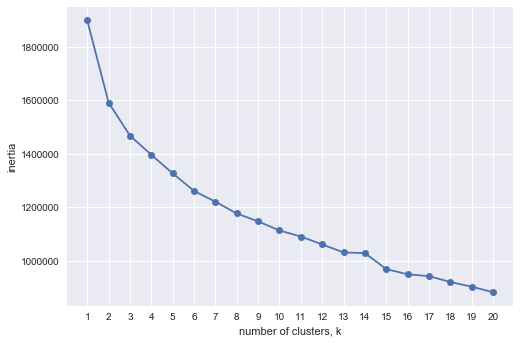

In [32]:
# create inertia model
ks = range(1,21)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(loan_scaled)
    inertias.append(model.inertia_)
    print("iteration {} done".format(k))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [161]:
# let's try 8 clusters
model = KMeans(n_clusters=8)
model.fit(loan_scaled)
labels_8 = model.predict(loan_scaled)

In [162]:
# create the dataframe and rename the predictions
labels_8 = pd.DataFrame(labels_8)
labels_8 = labels_8.rename(columns = {0:'labels_8'})
labels_8.head()

,labels_8
0,0
1,4
2,7
3,4
4,4


In [163]:
# concatenate the predictions with the original dataframe
results = pd.concat([labels_8, results], axis=1, join='inner')
results = results.rename(columns = {0:'labels_8'})
results.head()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
0,0,0,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1
1,4,0,11700,11700,11700.0,36,17.27,418.72,-3,5.0,120000.0,16164.0,0,1,0.0,52.0,16,1,3526,53.4,59,0.00,0.00,8793.12,8793.12,6087.32,2705.80,0.0,0.0,0.0,418.72,0,0.0,1,0,0.0,118473.0,6600.0,0.135,1,0
2,7,0,15000,15000,15000.0,36,17.27,536.81,-3,3.0,75000.0,11460.0,2,1,8.0,0.0,11,0,9690,67.3,28,529.13,529.13,18788.35,18788.35,14470.87,4317.48,0.0,0.0,0.0,536.81,0,28.0,1,0,0.0,14888.0,14400.0,0.153,0,1
3,4,0,5000,5000,5000.0,36,17.27,178.94,-3,10.0,29000.0,4271.7,0,0,0.0,66.0,7,2,4616,57.7,9,0.00,0.00,5211.24,5211.24,5000.00,211.24,0.0,0.0,0.0,4853.36,0,0.0,1,0,367.0,11564.0,8000.0,0.147,0,0
4,4,0,10000,10000,10000.0,36,17.27,357.88,-3,7.0,42000.0,10357.2,0,1,0.0,88.0,14,1,11370,46.8,22,0.00,0.00,9866.37,9866.37,6974.99,2891.38,0.0,0.0,0.0,382.00,0,0.0,1,0,0.0,29488.0,24300.0,0.247,1,0


In [164]:
# look at the number of predictions for each cluster
results['labels_8'].value_counts()

1    15488
0    11301
7    10622
2     4217
5     3457
6     2498
4     2339
3       35
Name: labels_8, dtype: int64

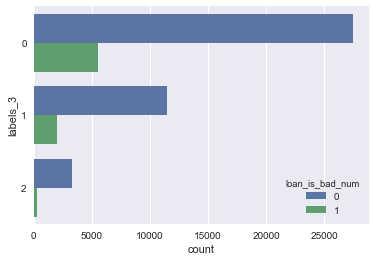

In [165]:
# create a countplot for the 3 cluster predictions
ax = sns.countplot(y="labels_3", hue="loan_is_bad_num", data=results)

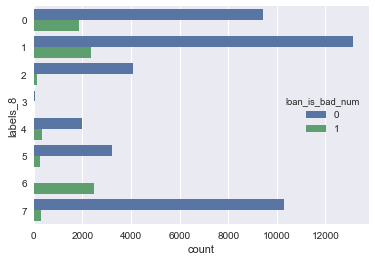

In [166]:
# create a countplot for the 8 cluster predictions
ax = sns.countplot(y="labels_8", hue="loan_is_bad_num", data=results)

In [167]:
# look at group 3 which has no good loans
results[results['labels_8'] == 3].describe()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.00000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000
mean,3.0,0.714286,17551.428571,17551.428571,17526.428571,43.542857,16.653143,546.381429,-3.285714,6.742857,85195.908571,12920.979714,1.800000,1.114286,0.857143,6.085714,13.714286,0.142857,16640.228571,51.928571,31.114286,1095.500286,1094.523714,18241.827456,18212.295143,14068.052000,3958.471429,0.0,215.303714,5.939760,5527.329143,0.085714,8.00000,1.0,1.171429,555.828571,211112.257143,36361.114286,0.169514,0.20000,0.171429
std,0.0,0.572478,8499.736031,8499.736031,8487.183120,11.304197,3.619119,250.082326,1.296407,3.600187,40663.869661,5564.463525,1.207818,1.231246,0.692092,21.191524,5.963474,0.550019,12388.709288,24.643047,11.908404,3884.956701,3881.324052,9958.268335,9935.573137,8346.573771,3517.495116,0.0,775.821137,24.655076,7232.448425,0.373491,17.19439,0.0,0.568057,2392.635053,200712.798643,35002.026821,0.073648,0.40584,0.382385
min,3.0,0.000000,2000.000000,2000.000000,2000.000000,36.000000,8.900000,66.550000,-6.000000,0.000000,30000.000000,2978.500000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,154.000000,0.900000,12.000000,0.000000,0.000000,786.730000,786.730000,244.170000,242.550000,0.0,0.000000,0.000000,56.660000,0.000000,0.00000,1.0,1.000000,0.000000,7317.000000,2800.000000,0.028000,0.00000,0.000000
25%,3.0,0.000000,11150.000000,11150.000000,11150.000000,36.000000,15.310000,379.130000,-4.000000,3.000000,60352.000000,9598.250000,1.000000,0.000000,0.000000,0.000000,10.500000,0.000000,8893.000000,33.400000,21.500000,0.000000,0.000000,10715.640000,10715.640000,8000.000000,2174.870000,0.0,0.000000,0.000000,610.040000,0.000000,0.00000,1.0,1.000000,0.000000,38553.500000,16850.000000,0.116500,0.00000,0.000000
50%,3.0,1.000000,18825.000000,18825.000000,18725.000000,36.000000,17.270000,510.950000,-3.000000,8.000000,75500.000000,13216.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000,13125.000000,57.000000,30.000000,0.000000,0.000000,18183.300000,18183.300000,14000.000000,2994.850000,0.0,0.000000,0.000000,1103.790000,0.000000,0.00000,1.0,1.000000,0.000000,146474.000000,22800.000000,0.168000,0.00000,0.000000
75%,3.0,1.000000,23000.000000,23000.000000,22900.000000,60.000000,18.750000,716.955000,-3.000000,10.000000,99000.000000,15686.800000,2.000000,2.000000,1.000000,0.000000,15.000000,0.000000,22239.500000,69.700000,38.500000,0.000000,0.000000,23615.043195,23486.980000,20000.000000,4911.410000,0.0,0.000000,0.000000,6694.180000,0.000000,2.00000,1.0,1.000000,0.000000,323862.000000,39623.500000,0.217000,0.00000,0.000000
max,3.0,2.000000,35000.000000,35000.000000,34950.000000,60.000000,23.630000,1218.610000,-1.000000,10.000000,200000.000000,30143.600000,6.000000,4.000000,2.000000,87.000000,39.000000,3.000000,49121.000000,99.000000,63.000000,18840.880000,18813.940000,42891.382340,42799.480000,35000.000000,19290.700000,0.0,3826.130000,140.556600,27592.620000,2.000000,70.00000,1.0,4.000000,13825.000000,697813.000000,148900.000000,0.298000,1.00000,1.000000


In [168]:
# look at some of group 4 which is the largest group
results[results['labels_8'] == 4].describe()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
count,2339.0,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.00000,2339.000000,2339.000000,2339.000000,2339.0,2339.0,2339.000000,2.339000e+03,2339.000000,2339.000000,2339.000000,2339.000000
mean,4.0,0.200513,11243.063275,11243.063275,11230.597245,38.924327,14.475960,366.098555,-2.504062,6.215904,63950.256554,9625.981796,0.138948,0.877298,16.895254,89.014536,10.656263,1.119282,9833.539119,55.285336,23.758016,331.934002,331.484951,12176.051291,12162.578080,9840.571757,2251.766473,0.475080,83.237978,4.77097,3383.630077,0.004275,7.144934,1.0,0.0,100.419410,8.758243e+04,15872.155622,0.159926,0.148354,0.225310
std,0.0,0.455439,5706.602112,5706.602112,5697.990199,7.852294,3.372702,178.310811,1.202135,3.493362,31635.572532,5607.720705,0.518207,1.023209,24.413228,23.350268,4.294626,0.475094,6583.040547,21.610558,10.710456,1397.535627,1395.459501,6743.699336,6734.027093,5637.599463,1789.402443,3.513839,401.460677,35.20964,4448.124003,0.077264,19.039330,0.0,0.0,753.386409,1.158581e+05,12526.724238,0.074288,0.355527,0.417876
min,4.0,0.000000,1000.000000,1000.000000,1000.000000,36.000000,6.000000,32.810000,-6.000000,0.000000,8832.000000,300.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,108.130000,108.130000,30.360000,18.960000,0.000000,0.000000,0.00000,1.520000,0.000000,0.000000,1.0,0.0,0.000000,0.000000e+00,0.000000,0.004000,0.000000,0.000000
25%,4.0,0.000000,7112.500000,7112.500000,7112.500000,36.000000,12.120000,239.550000,-3.000000,3.000000,43788.000000,5724.700000,0.000000,0.000000,0.000000,79.000000,8.000000,1.000000,5702.000000,40.000000,16.000000,0.000000,0.000000,7085.872764,7085.875000,5600.000000,1047.350000,0.000000,0.000000,0.00000,342.805000,0.000000,0.000000,1.0,0.0,0.000000,1.088900e+04,8300.000000,0.103000,0.000000,0.000000
50%,4.0,0.000000,10000.000000,10000.000000,10000.000000,36.000000,14.330000,345.790000,-2.000000,7.000000,58000.000000,8845.200000,0.000000,1.000000,0.000000,94.000000,10.000000,1.000000,8455.000000,56.900000,22.000000,0.000000,0.000000,11481.450000,11468.780000,9471.010000,1864.530000,0.000000,0.000000,0.00000,951.640000,0.000000,0.000000,1.0,0.0,0.000000,3.575700e+04,14700.000000,0.154000,0.000000,0.000000
75%,4.0,0.000000,15000.000000,15000.000000,15000.000000,36.000000,16.290000,479.100000,-2.000000,10.000000,78000.000000,12514.200000,0.000000,1.000000,31.000000,107.000000,13.000000,1.000000,12674.500000,71.300000,29.000000,0.000000,0.000000,16096.757765,16038.350000,13000.000000,2869.200000,0.000000,0.000000,0.00000,5124.980000,0.000000,0.000000,1.0,0.0,0.000000,1.396520e+05,21700.000000,0.212000,0.000000,0.000000
max,4.0,2.000000,35000.000000,35000.000000,35000.000000,60.000000,24.890000,1295.740000,0.000000,10.000000,450000.000000,86814.000000,10.000000,6.000000,82.000000,119.000000,39.000000,8.000000,76260.000000,99.700000,68.000000,15977.270000,15977.270000,44498.826830,44498.830000,35000.000000,13449.930000,50.090000,11268.790000,870.30000,31247.660000,2.000000,83.000000,1.0,0.0,23828.000000,2.302431e+06,112600.000000,0.350000,1.000000,1.000000


In [169]:
# look at group 6 which is an outlier group
results[results['labels_8'] == 6].describe()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
count,2498.0,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.0,2498.0,2498.000000,2.498000e+03,2498.000000,2498.000000,2498.000000,2498.000000
mean,6.0,0.630905,22254.503603,22231.385108,22208.075118,51.679744,18.611817,653.326465,-4.074059,6.459568,77670.174424,14216.109392,0.271417,1.083667,17.147318,1.017614,12.136910,0.013611,19840.564452,66.655524,27.080464,0.331393,0.331393,12578.084670,12564.922846,5540.405893,4891.046781,3.722165,2142.909808,181.265200,633.715163,0.001201,6.733387,1.0,0.0,37.558447,1.045363e+05,21813.402322,0.194771,0.999600,0.000400
std,0.0,0.482656,6361.700536,6348.357562,6343.856977,11.424173,3.687278,210.028665,1.471842,3.456371,37158.090615,6752.371631,0.722647,1.102935,23.329128,9.388710,4.638954,0.119298,14323.041429,20.688061,10.768560,16.563027,16.563027,6412.054642,6406.402336,3886.210713,3024.551901,13.858093,2210.570470,324.228223,470.819811,0.034641,17.376954,0.0,0.0,504.807315,1.335416e+05,23343.038013,0.073917,0.020008,0.020008
min,6.0,0.000000,5700.000000,5700.000000,5700.000000,36.000000,6.030000,158.120000,-6.000000,0.000000,22000.000000,180.840000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,571.700000,571.700000,0.000000,83.540000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,1.0,0.0,0.000000,0.000000e+00,0.000000,0.002000,0.000000,0.000000
25%,6.0,0.000000,18000.000000,18000.000000,17925.000000,36.000000,15.800000,499.272500,-5.000000,3.000000,53178.250000,9577.887500,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,10862.500000,54.300000,19.000000,0.000000,0.000000,7867.937500,7866.850000,2608.430000,2635.820000,0.000000,975.612500,10.646350,459.140000,0.000000,0.000000,1.0,0.0,0.000000,0.000000e+00,0.000000,0.141000,1.000000,0.000000
50%,6.0,1.000000,20800.000000,20800.000000,20787.500000,60.000000,19.050000,607.450000,-4.000000,7.000000,70000.000000,13150.790000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,16574.000000,69.800000,26.000000,0.000000,0.000000,11814.945000,11805.615000,4779.890000,4205.165000,0.000000,1865.090000,23.129050,576.630000,0.000000,0.000000,1.0,0.0,0.000000,4.393300e+04,18300.000000,0.197000,1.000000,0.000000
75%,6.0,1.000000,26375.000000,26318.750000,26300.000000,60.000000,21.490000,766.450000,-3.000000,10.000000,90000.000000,17641.307500,0.000000,2.000000,30.000000,0.000000,15.000000,0.000000,25199.750000,82.800000,33.000000,0.000000,0.000000,16249.245000,16239.240000,7367.437500,6521.397500,0.000000,2800.205000,272.509200,757.467500,0.000000,0.000000,1.0,0.0,0.000000,1.709102e+05,32661.500000,0.249750,1.000000,0.000000
max,6.0,1.000000,35000.000000,35000.000000,35000.000000,60.000000,24.890000,1366.360000,0.000000,10.000000,472000.000000,48776.000000,11.000000,6.000000,97.000000,118.000000,38.000000,2.000000,149626.000000,101.000000,64.000000,827.820000,827.820000,38357.700000,38357.700000,26538.020000,19473.520000,194.370000,33520.270000,3896.236100,12094.630000,1.000000,86.000000,1.0,0.0,18781.000000,1.209818e+06,230010.000000,0.350000,1.000000,1.000000


In [181]:
# look at overall dataset statistics
results = results[results['risk_factor'] == -4.0]
results[['loan_amnt','total_rec_prncp','risk_factor']]

,loan_amnt,total_rec_prncp,risk_factor


In [68]:
# look at loan amounts for each of the 8 clusters
results.groupby('labels_8')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
labels_8,,,,,,,,
0,11262.0,9054.848162,3345.100860,1000.0,6550.0,9800.0,11868.75,23750.0
1,2335.0,11233.094218,5695.229423,1000.0,7112.5,10000.0,15000.00,35000.0
2,4236.0,28499.173749,4894.591191,12425.0,25000.0,28100.0,33425.00,35000.0
3,2500.0,22258.170000,6364.066313,5700.0,18000.0,20825.0,26381.25,35000.0
4,15490.0,7593.050355,3378.845785,1000.0,5000.0,7500.0,10000.00,26325.0
5,3453.0,22921.763684,5808.014008,9300.0,18000.0,21250.0,26400.00,35000.0
6,53.0,16314.150943,7971.274313,2400.0,10000.0,16000.0,21000.00,35000.0
7,10628.0,18108.882198,3380.791356,11000.0,15000.0,18000.0,20000.00,35000.0


In [94]:
# look at average amounts for each of the 8 clusters
results.groupby('labels_8')[['loan_amnt','risk_factor','emp_length','annual_inc']].mean()

,loan_amnt,risk_factor,emp_length,annual_inc
labels_8,,,,
0,9054.848162,-2.218256,6.162849,68175.187521
1,11233.094218,-2.502355,6.220128,63942.643717
2,28499.173749,-3.508263,6.506138,123364.944389
3,22258.170000,-4.075600,6.450400,77679.345884
4,7593.050355,-1.883602,4.679019,50619.899412
5,22921.763684,-3.833478,6.656241,84098.924254
6,16314.150943,-2.754717,6.264151,76548.132075
7,18108.882198,-2.064264,6.135868,80069.914968


### 3.3 Summary of clusters
 - Look at the largest groups – what type of borrowers does this resemble? 
 - What about the outlier groups?  Are they different than the rest of the groups?  What makes them different?
 
 #### Summary: 
  - The largest groups are groups 0 and 4 with the largest being group 4 (this group seems to not be in a job as long since they have a significantly lower average employed length). These groups look to be smaller borrowers (by average loan amount) which would be the bulk of this company's transactions. Cluster group 3 is definitely an outlier group being that is has no good loans. Not only that but the average loan amount is also well above average so these are the high risk customers that shouldn't be given a loan. Group 7 is also sizable but has the best ratio of good loans to bad loans outside of group 6 which has a very small sample size. Groups 6 and 7 would have a high likelihood of honoring their loans.

### 4. Cluster Analysis for the largest group– what are the borrower groups within this specific sector of customers?
 -  We would like to delve deeper into the differences between borrowers within the largest group. 
 
### 4.1 Data preparation
 - Import the large_cluster.csv and name it loan_largest.

In [72]:
loan_largest = pd.read_csv('data/large_cluster.csv', header=0, index_col=None)
loan_largest = loan_largest.drop(['Unnamed: 0'], axis=1) 
loan_largest.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted
0,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1,2,1
1,10500,10500,10500.0,36,17.27,375.77,-3,10.0,80000.0,23272.0,0,0,38.0,0.0,17,0,38985,90.5,30,0.00,0.00,11268.76,11268.76,8352.04,2916.72,0.0,0.0,0.0,375.77,0,0.0,1,0,0.0,75921.0,43100.0,0.291,1,0,2,1
2,10000,10000,9950.0,36,17.27,357.88,-3,4.0,60000.0,11142.0,3,0,12.0,0.0,15,0,41140,84.3,32,0.00,0.00,11510.06,11452.53,10000.00,1510.06,0.0,0.0,0.0,7587.89,0,33.0,1,0,0.0,312510.0,48800.0,0.186,0,0,2,1
3,16000,16000,16000.0,60,17.27,399.97,-3,7.0,122000.0,22143.0,1,2,16.0,0.0,15,0,14349,61.6,27,0.00,0.00,11990.56,11990.56,6307.19,5683.37,0.0,0.0,0.0,399.97,0,0.0,1,0,0.0,62941.0,23300.0,0.182,1,0,2,1
4,6500,6500,6500.0,36,17.27,232.62,-3,5.0,42000.0,10907.4,0,2,36.0,0.0,12,0,4087,70.5,20,0.00,0.00,7190.69,7190.69,6500.00,690.69,0.0,0.0,0.0,5562.35,0,79.0,1,0,0.0,58025.0,5800.0,0.260,0,0,2,1


In [73]:
loan_largest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11325 entries, 0 to 11324
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    11325 non-null  int64  
 1   funded_amnt                  11325 non-null  int64  
 2   funded_amnt_inv              11325 non-null  float64
 3   term                         11325 non-null  int64  
 4   int_rate                     11325 non-null  float64
 5   installment                  11325 non-null  float64
 6   risk_factor                  11325 non-null  int64  
 7   emp_length                   11325 non-null  float64
 8   annual_inc                   11325 non-null  float64
 9   total_debt                   11325 non-null  float64
 10  delinq_2yrs                  11325 non-null  int64  
 11  inq_last_6mths               11325 non-null  int64  
 12  mths_since_last_delinq       11325 non-null  float64
 13  mths_since_last_

### 4.2 Using the new dataframe for the one specific customer group – create a KMeans Cluster for (using the loan_largest DataFrame) 
 - Create a KMeans for 3 clusters. 
 - Create an inertias model to see how many clusters are ideal.  You should be able to use the same as given.  
 - Create a KMeans cluster based on the inertias model chart. 
 - Create a countplot that shows the number of loans in each cluster (similar to the countplot that was created above)

In [74]:
scaler = StandardScaler()

In [75]:
# normalize the data with StandardScaler
loan_largest_s = scaler.fit_transform(loan_largest)
loan_largest_s = pd.DataFrame(loan_largest_s,columns=loan_largest.columns+'_s')
loan_largest_s.head()

,loan_amnt_s,funded_amnt_s,funded_amnt_inv_s,term_s,int_rate_s,installment_s,risk_factor_s,emp_length_s,annual_inc_s,total_debt_s,delinq_2yrs_s,inq_last_6mths_s,mths_since_last_delinq_s,mths_since_last_record_s,open_acc_s,pub_rec_s,revol_bal_s,revol_util_s,total_acc_s,out_prncp_s,out_prncp_inv_s,total_pymnt_s,total_pymnt_inv_s,total_rec_prncp_s,total_rec_int_s,total_rec_late_fee_s,recoveries_s,collection_recovery_fee_s,last_pymnt_amnt_s,collections_12_mths_ex_med_s,mths_since_last_major_derog_s,policy_code_s,acc_now_delinq_s,tot_coll_amt_s,tot_cur_bal_s,total_credit_rv_s,dti_s,loan_is_bad_num_s,loan_currency_num_s,K3 - Predicted_s,K8 - Predicted_s
0,-2.100663,-2.101295,-2.100564,-0.172974,1.062055,-2.038062,-0.659544,-1.174650,-1.184933,-1.088816,-0.393242,-0.029367,1.837909,-0.018942,-0.548521,-0.023024,-0.655471,0.635896,-1.732092,0.004077,0.004409,-1.762708,-1.761785,-1.714082,-1.158331,-0.152403,-0.275825,-0.161348,-0.743117,0.0,2.517464,0.0,-0.026588,-0.071296,-0.538989,-0.494297,0.618235,-0.449415,3.295245,0.065241,0.0
1,0.436236,0.436701,0.440838,-0.172974,1.062055,0.625674,-0.659544,1.090254,0.341115,1.562460,-0.393242,-0.955779,0.565526,-0.018942,0.808354,-0.023024,1.633282,1.354438,-0.029006,-0.173678,-0.173778,0.404844,0.408498,0.118143,1.405417,-0.152403,-0.275825,-0.161348,-0.631046,0.0,-0.530297,0.0,-0.026588,-0.071296,-0.243748,0.951118,1.120885,2.225113,-0.303468,0.065241,0.0
2,0.287007,0.287408,0.276394,-0.172974,1.062055,0.469015,-0.659544,-0.608424,-0.224088,-0.373629,2.837809,-0.955779,-0.468286,-0.018942,0.356062,-0.023024,1.789214,1.067021,0.171357,-0.173678,-0.173778,0.464500,0.453988,0.588102,-0.134121,-0.152403,-0.275825,-0.161348,2.026085,0.0,0.906505,0.0,-0.026588,-0.071296,1.520964,1.198532,-0.387065,-0.449415,-0.303468,0.065241,0.0
3,2.077758,2.078934,2.085275,5.781219,1.062055,0.837589,-0.659544,0.240915,1.528041,1.382258,0.683775,0.897045,-0.309238,-0.018942,0.356062,-0.023024,-0.149327,0.014704,-0.329551,-0.173678,-0.173778,0.583294,0.587173,-0.464999,4.433414,-0.152403,-0.275825,-0.161348,-0.622130,0.0,-0.530297,0.0,-0.026588,-0.071296,-0.340566,0.091682,-0.444511,2.225113,-0.303468,0.065241,0.0
4,-0.757599,-0.757650,-0.755116,-0.172974,1.062055,-0.627864,-0.659544,-0.325311,-0.732771,-0.411074,-0.393242,0.897045,0.486002,-0.018942,-0.322375,-0.023024,-0.891864,0.427286,-1.030821,-0.173678,-0.173778,-0.603376,-0.600993,-0.410014,-1.030891,-0.152403,-0.275825,-0.161348,1.279824,0.0,2.909319,0.0,-0.026588,-0.071296,-0.377234,-0.667920,0.675681,-0.449415,-0.303468,0.065241,0.0


In [76]:
model = KMeans(n_clusters=3)

In [77]:
# fit the data and predict
model.fit(loan_largest_s)
labels_3 = model.predict(loan_largest_s)

In [78]:
# create the dataframe and rename the predictions
labels_3 = pd.DataFrame(labels_3)
labels_3 = labels_3.rename(columns = {0:'labels_3'})
labels_3.head()

,labels_3
0,1
1,2
2,2
3,2
4,1


In [79]:
# concatenate the predictions with the original dataframe
results2 = pd.concat([labels_3, loan_largest], axis=1, join='inner')
results2 = results2.rename(columns = {0:'labels_3'})
results2.head()

,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted
0,1,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1,2,1
1,2,10500,10500,10500.0,36,17.27,375.77,-3,10.0,80000.0,23272.0,0,0,38.0,0.0,17,0,38985,90.5,30,0.00,0.00,11268.76,11268.76,8352.04,2916.72,0.0,0.0,0.0,375.77,0,0.0,1,0,0.0,75921.0,43100.0,0.291,1,0,2,1
2,2,10000,10000,9950.0,36,17.27,357.88,-3,4.0,60000.0,11142.0,3,0,12.0,0.0,15,0,41140,84.3,32,0.00,0.00,11510.06,11452.53,10000.00,1510.06,0.0,0.0,0.0,7587.89,0,33.0,1,0,0.0,312510.0,48800.0,0.186,0,0,2,1
3,2,16000,16000,16000.0,60,17.27,399.97,-3,7.0,122000.0,22143.0,1,2,16.0,0.0,15,0,14349,61.6,27,0.00,0.00,11990.56,11990.56,6307.19,5683.37,0.0,0.0,0.0,399.97,0,0.0,1,0,0.0,62941.0,23300.0,0.182,1,0,2,1
4,1,6500,6500,6500.0,36,17.27,232.62,-3,5.0,42000.0,10907.4,0,2,36.0,0.0,12,0,4087,70.5,20,0.00,0.00,7190.69,7190.69,6500.00,690.69,0.0,0.0,0.0,5562.35,0,79.0,1,0,0.0,58025.0,5800.0,0.260,0,0,2,1


In [80]:
# look at the number of predictions for each cluster
results2['labels_3'].value_counts()

2    6665
1    4546
0     114
Name: labels_3, dtype: int64

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done


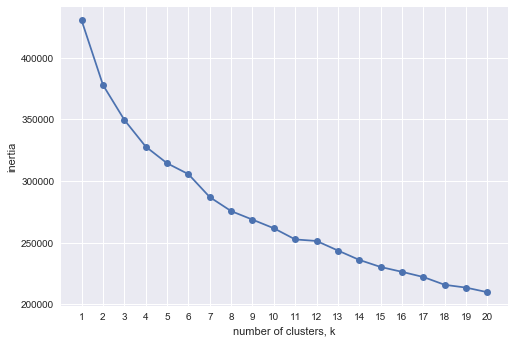

In [81]:
# create inertia model
ks = range(1,21)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(loan_largest_s)
    inertias.append(model.inertia_)
    print("iteration {} done".format(k))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [82]:
# let's try 8 clusters
model = KMeans(n_clusters=8)
model.fit(loan_largest_s)
labels_8 = model.predict(loan_largest_s)

In [83]:
# create the dataframe and rename the predictions
labels_8 = pd.DataFrame(labels_8)
labels_8 = labels_8.rename(columns = {0:'labels_8'})
labels_8.head()

,labels_8
0,1
1,2
2,2
3,2
4,5


In [84]:
# concatenate the predictions with the original dataframe
results2 = pd.concat([labels_8, results2], axis=1, join='inner')
results2 = results2.rename(columns = {0:'labels_8'})
results2.head()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted
0,1,1,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,0,1,70.0,0.0,11,0,7354,75.0,13,72.85,72.85,2501.40,2501.40,1927.15,574.25,0.0,0.0,0.0,71.58,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1,2,1
1,2,2,10500,10500,10500.0,36,17.27,375.77,-3,10.0,80000.0,23272.0,0,0,38.0,0.0,17,0,38985,90.5,30,0.00,0.00,11268.76,11268.76,8352.04,2916.72,0.0,0.0,0.0,375.77,0,0.0,1,0,0.0,75921.0,43100.0,0.291,1,0,2,1
2,2,2,10000,10000,9950.0,36,17.27,357.88,-3,4.0,60000.0,11142.0,3,0,12.0,0.0,15,0,41140,84.3,32,0.00,0.00,11510.06,11452.53,10000.00,1510.06,0.0,0.0,0.0,7587.89,0,33.0,1,0,0.0,312510.0,48800.0,0.186,0,0,2,1
3,2,2,16000,16000,16000.0,60,17.27,399.97,-3,7.0,122000.0,22143.0,1,2,16.0,0.0,15,0,14349,61.6,27,0.00,0.00,11990.56,11990.56,6307.19,5683.37,0.0,0.0,0.0,399.97,0,0.0,1,0,0.0,62941.0,23300.0,0.182,1,0,2,1
4,5,1,6500,6500,6500.0,36,17.27,232.62,-3,5.0,42000.0,10907.4,0,2,36.0,0.0,12,0,4087,70.5,20,0.00,0.00,7190.69,7190.69,6500.00,690.69,0.0,0.0,0.0,5562.35,0,79.0,1,0,0.0,58025.0,5800.0,0.260,0,0,2,1


In [85]:
# look at the number of predictions for each cluster
results2['labels_8'].value_counts()

2    2970
5    2248
7    2188
1    2038
4    1106
0     655
3     114
6       6
Name: labels_8, dtype: int64

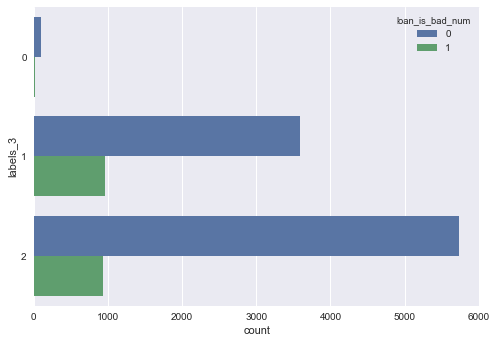

In [86]:
# create a countplot for the 3 cluster predictions
ax = sns.countplot(y="labels_3", hue="loan_is_bad_num", data=results2)

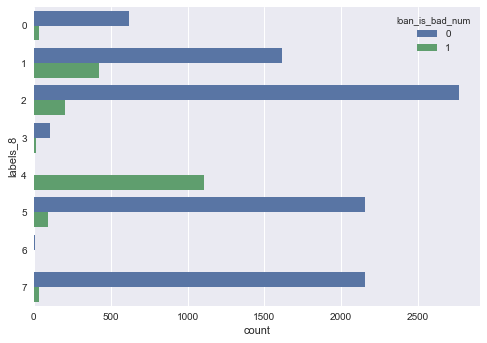

In [87]:
# create a countplot for the 8 cluster predictions
ax = sns.countplot(y="labels_8", hue="loan_is_bad_num", data=results2)

In [97]:
# look at group 4 which doesn't look good
results2[results2['labels_8'] == 4].describe()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted
count,1106.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.0,1106.000000,1106.0,1106.000000,1106.000000,1106.000000,1106.0,1106.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.0,1106.000000,1106.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.0,1106.0,1106.0,1106.0
mean,4.0,1.603978,12169.009946,12169.009946,12156.304449,37.475588,14.824819,410.508987,-2.625678,5.849910,60881.650922,12798.218870,0.318264,1.068716,22.466546,0.0,13.442134,0.0,15171.036166,62.733544,28.833635,0.0,0.0,6158.623689,6152.632116,3962.122595,1645.047125,1.319789,550.134186,25.176854,407.637197,0.0,10.169078,1.0,0.000904,34.169078,83948.437613,18088.716998,0.224338,1.0,0.0,2.0,1.0
std,0.0,0.489290,3354.660389,3354.660389,3348.946934,5.767740,3.025932,110.490748,1.077550,3.472072,27630.303973,4860.186613,0.968262,1.074079,25.119502,0.0,4.168704,0.0,9524.217302,19.837564,9.172918,0.0,0.0,3111.113842,3108.531691,2405.396260,794.444730,5.708415,443.790200,47.737009,141.496637,0.0,21.512732,0.0,0.030069,267.523422,110013.100058,17510.956224,0.068839,0.0,0.0,0.0,0.0
min,4.0,1.000000,3000.000000,3000.000000,3000.000000,36.000000,6.030000,99.820000,-6.000000,0.000000,18000.000000,2576.000000,0.000000,0.000000,0.000000,0.0,3.000000,0.0,22.000000,0.200000,9.000000,0.0,0.0,382.110000,382.110000,84.800000,73.970000,0.000000,0.000000,0.000000,20.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.027000,1.0,0.0,2.0,1.0
25%,4.0,1.000000,10000.000000,10000.000000,10000.000000,36.000000,13.110000,338.957500,-3.000000,3.000000,42000.000000,9495.000000,0.000000,0.000000,0.000000,0.0,10.000000,0.0,8753.500000,49.325000,22.000000,0.0,0.0,3699.245000,3687.707500,2056.462500,1061.867500,0.000000,0.000000,0.000000,332.720000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.173250,1.0,0.0,2.0,1.0
50%,4.0,2.000000,12000.000000,12000.000000,11975.000000,36.000000,14.650000,397.765000,-3.000000,6.000000,55000.000000,12281.500000,0.000000,1.000000,15.000000,0.0,13.000000,0.0,13336.000000,64.300000,28.000000,0.0,0.0,5810.790000,5810.790000,3551.600000,1579.845000,0.000000,574.330000,6.969250,396.505000,0.0,0.000000,1.0,0.000000,0.000000,35495.000000,16400.000000,0.226000,1.0,0.0,2.0,1.0
75%,4.0,2.000000,15000.000000,15000.000000,14993.750000,36.000000,17.270000,485.960000,-2.000000,10.000000,71000.000000,15284.200000,0.000000,2.000000,41.000000,0.0,16.000000,0.0,19005.500000,78.375000,34.000000,0.0,0.0,8207.995000,8201.465000,5496.655000,2185.340000,0.000000,846.885000,12.086450,495.450000,0.0,0.000000,1.0,0.000000,0.000000,133738.500000,27400.000000,0.281000,1.0,0.0,2.0,1.0
max,4.0,2.000000,23750.000000,23750.000000,23750.000000,60.000000,24.700000,785.980000,0.000000,10.000000,310000.000000,32232.000000,14.000000,6.000000,148.000000,0.0,36.000000,0.0,99433.000000,101.200000,63.000000,0.0,0.0,16002.480000,16002.480000,12143.350000,4994.550000,64.340000,1750.370000,268.299000,1398.020000,0.0,148.000000,1.0,1.000000,5562.000000,884168.000000,97100.000000,0.349000,1.0,0.0,2.0,1.0


In [96]:
# look at average amounts for each of the 8 clusters
results2.groupby('labels_8')[['loan_amnt','risk_factor','emp_length','annual_inc','dti']].mean()

,loan_amnt,risk_factor,emp_length,annual_inc,dti
labels_8,,,,,
0,8026.793893,-1.552672,6.987786,137568.102962,0.199702
1,4292.639843,-2.049558,6.152110,63819.857169,0.222701
2,11424.722222,-2.833670,5.960943,61473.408997,0.217039
3,8327.412281,-3.096491,5.675439,68842.184211,0.209237
4,12169.009946,-2.625678,5.849910,60881.650922,0.224338
5,7311.321174,-2.530249,6.116993,59192.173728,0.208000
6,4970.833333,-3.333333,3.500000,92166.666667,0.239667
7,10762.454296,-1.210695,6.366545,72099.263862,0.201740


In [95]:
results2.describe()

,labels_8,labels_3,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted
count,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.0,11325.000000,11325.0,11325.000000,11325.000000,1.132500e+04,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.0
mean,3.473377,1.578455,9038.370861,9037.443709,9025.569284,36.697219,13.600419,304.320013,-2.227285,6.149051,67929.475661,13482.862417,0.365121,1.031700,23.777219,0.011921,13.425519,0.000530,16412.730331,61.282817,30.289536,71.179197,71.047408,9631.239140,9618.539200,7937.758262,1632.604924,0.653445,60.222547,2.746118,2088.586006,0.0,12.179691,1.0,0.000706,69.358234,1.085995e+05,21187.792318,0.212952,0.168035,0.084327,1.995762,1.0
std,2.294912,0.513810,3350.696025,3349.246984,3344.758035,4.030951,3.455322,114.201793,1.171642,3.532315,35387.092380,6265.485356,0.928532,1.079481,25.150762,0.629362,4.422120,0.023012,13820.798494,21.572389,9.982321,409.851863,408.859045,4044.999594,4039.909511,3506.759056,913.730192,4.287814,218.345767,17.020584,2714.370581,0.0,22.968693,0.0,0.026570,972.867259,1.340725e+05,23039.378405,0.069634,0.373914,0.277889,0.064968,0.0
min,0.000000,0.000000,1000.000000,1000.000000,1000.000000,36.000000,6.000000,32.350000,-6.000000,0.000000,8520.000000,817.950000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,174.510000,174.510000,61.600000,9.100000,0.000000,0.000000,0.000000,0.300000,0.0,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.011000,0.000000,0.000000,1.000000,1.0
25%,2.000000,1.000000,6500.000000,6500.000000,6500.000000,36.000000,11.140000,217.410000,-3.000000,3.000000,45000.000000,9338.600000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,8349.000000,46.700000,23.000000,0.000000,0.000000,6551.680000,6549.640000,5145.210000,926.460000,0.000000,0.000000,0.000000,294.430000,0.0,0.000000,1.0,0.000000,0.000000,4.109000e+03,800.000000,0.162000,0.000000,0.000000,2.000000,1.0
50%,2.000000,2.000000,9750.000000,9750.000000,9750.000000,36.000000,14.090000,323.300000,-2.000000,6.000000,60000.000000,12442.500000,0.000000,1.000000,17.000000,0.000000,13.000000,0.000000,13088.000000,63.300000,29.000000,0.000000,0.000000,10119.590000,10102.640000,8373.910000,1540.090000,0.000000,0.000000,0.000000,450.440000,0.0,0.000000,1.0,0.000000,0.000000,4.998700e+04,17100.000000,0.214000,0.000000,0.000000,2.000000,1.0
75%,5.000000,2.000000,11750.000000,11750.000000,11725.000000,36.000000,15.800000,387.400000,-1.000000,10.000000,80500.000000,16249.830000,0.000000,2.000000,42.000000,0.000000,16.000000,0.000000,20445.000000,78.500000,36.000000,0.000000,0.000000,12783.450000,12761.180000,10575.000000,2253.910000,0.000000,0.000000,0.000000,3366.210000,0.0,14.000000,1.0,0.000000,0.000000,1.772420e+05,30200.000000,0.267000,0.000000,0.000000,2.000000,1.0
max,7.000000,2.000000,23750.000000,23750.000000,23750.000000,60.000000,24.830000,785.980000,0.000000,10.000000,650000.000000,74008.000000,18.000000,8.000000,152.000000,49.000000,50.000000,1.000000,308071.000000,104.400000,81.000000,5883.140000,5883.140000,20897.740000,20897.740000,16800.000000,5962.

### 4.3 Hierarchal Clustering for Specific Group 
 - Create a dendrogram to visualize the number of possible clusters using hierarchal clustering.
 - Create clusters based on the dendrogram

In [99]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
mergings_scale = linkage(loan_largest_s, method='complete')

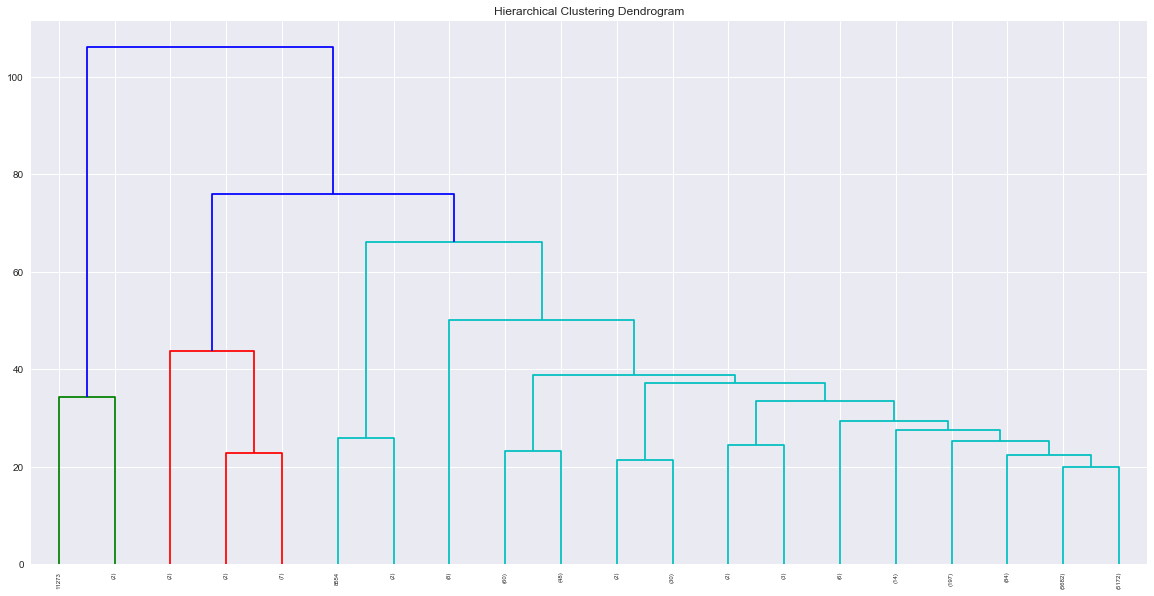

In [103]:
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(mergings_scale, leaf_rotation=90, leaf_font_size=6,truncate_mode='lastp',p=20)
plt.show()

In [125]:
# based off the dendrogram, it looks like a distance of 70 makes sense (3 clusters)
loan_pred = fcluster(mergings_scale, 70, criterion='distance')

In [126]:
loan_pred = pd.DataFrame(loan_pred)
loan_pred.columns = ['loan_pred']
loan_pred.head()

,loan_pred
0,3
1,3
2,3
3,3
4,3


In [127]:
result3 = pd.concat([loan_pred, loan_largest], axis=1)
result3.loan_pred.value_counts()

3    11311
2       11
1        3
Name: loan_pred, dtype: int64

In [128]:
result3[result3['loan_pred'] == 2]

,loan_pred,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted
609,2,5000,5000,5000.0,36,13.11,168.74,-2,0.0,40000.0,11568.0,0,2,62.0,0.0,9,0,7772,41.6,22,0.0,0.0,6035.899366,6035.90,5000.0,1035.90,0.0,0.0,0.0,1149.79,0,0.0,1,0,21380.0,45478.0,18700.0,0.289,0,0,2,1
1297,2,15900,15900,15900.0,36,13.11,536.58,-2,6.0,60000.0,6876.0,0,2,64.0,0.0,12,0,22484,63.3,25,0.0,0.0,18016.525390,18016.53,15900.0,2116.53,0.0,0.0,0.0,437.13,0,64.0,1,0,33853.0,181847.0,35500.0,0.115,0,0,2,1
1574,2,15000,15000,15000.0,36,19.05,550.22,-4,2.0,45000.0,3730.5,0,0,60.0,0.0,8,0,12583,68.0,21,0.0,0.0,19576.119420,19576.12,15000.0,4576.12,0.0,0.0,0.0,4181.69,0,60.0,1,0,15674.0,12583.0,18500.0,0.083,0,0,2,1
3275,2,9000,9000,9000.0,36,16.29,317.71,-3,10.0,50000.0,9215.0,3,0,9.0,0.0,6,0,10360,90.9,30,0.0,0.0,10892.955180,10892.96,9000.0,1892.96,0.0,0.0,0.0,4864.58,0,22.0,1,0,13254.0,37503.0,11400.0,0.184,0,0,2,1
3277,2,8000,8000,7950.0,36,16.29,282.41,-3,10.0,94000.0,5207.6,0,0,41.0,0.0,8,0,7222,48.1,30,0.0,0.0,9499.914143,9440.55,8000.0,1499.91,0.0,0.0,0.0,4989.02,0,41.0,1,0,12766.0,7347.0,15000.0,0.055,0,0,2,1
3504,2,11275,11275,11275.0,36,16.29,398.02,-3,5.0,85000.0,15742.0,0,1,62.0,0.0,21,0,6430,43.7,47,0.0,0.0,12881.510000,12881.51,11275.0,1606.51,0.0,0.0,0.0,8506.98,0,62.0,1,0,55009.0,216793.0,14700.0,0.185,0,0,2,1
6930,2,8000,8000,8000.0,36,14.09,273.78,-2,10.0,80000.0,9008.0,1,0,12.0,0.0,7,0,11924,68.5,21,0.0,0.0,9855.673663,9855.67,8000.0,1855.67,0.0,0.0,0.0,273.37,0,69.0,1,0,29662.0,61613.0,17400.0,0.113,0,0,2,1
9426,2,12000,12000,12000.0,36,8.90,381.04,-1,1.0,88000.0,3669.6,0,0,38.0,0.0,11,0,11656,17.2,37,0.0,0.0,13711.410000,13711.41,12000.0,1711.41,0.0,0.0,0.0,1137.09,0,38.0,1,0,16357.0,11656.0,67900.0,0.042,0,0,2,1
9569,2,4800,4800,4800.0,36,8.90,152.42,-1,3.0,58000.0,11234.6,0,1,0.0,0.0,10,0,8592,24.4,32,0.0,0.0,5355.716753,5355.72,4800.0,555.72,0.0,0.0,0.0,2313.01,0,0.0,1,0,43978.0,179808.0,35200.0,0.194,0,0,2,1
9906,2,10000,10000,10000.0,36,8.90,317.54,-1,10.0,93000.0,7774.8,0,1,68.0,0.0,16,0,9879,44.3,43,0.0,0.0,11257.774780,11257.77,10000.0,1257.77,0.0,0.0,0.0,3969.69,0,68.0,1,0,13835.0,232824.0,22300.0,0.084,0,0,2,1


In [130]:
# look at average amounts for each of the 3 clusters
result3.groupby('loan_pred')[['loan_amnt','risk_factor','emp_length','annual_inc','dti']].mean()

,loan_amnt,risk_factor,emp_length,annual_inc,dti
loan_pred,,,,,
1,3333.333333,-4.333333,3.333333,79000.000000,0.221667
2,10088.636364,-2.090909,5.818182,73000.000000,0.125909
3,9038.862612,-2.226859,6.150119,67921.608333,0.213034


### 4.4 Summary of clusters
 - Did they group?  If so, what are the characteristics of the new groups?   
 - Are there differences in the loan amounts?  What are their employment lengths, risk factors, etc. 
 - Give some meaningful analysis that you feel would benefit Appleton. 
 
 #### Summary: 
 - From the 8 cluster model, we can see that group 4 is the high risk customers for this group. On average, their borrowed amount is above average but their annual income is below average. Every loan in this group is bad so Appleton should avoid giving loans to this group of customers. Group 0 has a very high average annual income, low debt to income ratio, and a low risk factor so this group can be trusted to pay back loans. Group 6 is the other concerning group that Appleton should think about denying loans to since they have the highest averge debt-to-income ratio, highest risk factor, and least amount of average employed length.
 - For the dendrogram, I would honestly say that it was hard to cluster groups into a very meaningful way. The groupings were very skewed toward one side.
 
 

### 5. Recommender Systems for Products
 - Based on the notebook used in class, create a recommender system that looks at the items purchased based on sales. 
 - To aggregate the data: 
     - Read in Stratus_Recommender.csv as stratus, Stratus_Parent.csv as st_parent, Stratus_Lot.csv as st_lot 
     - Group stratus by LotDescription and Parent and then show the Revenue as a sum.  Name this new DataFrame as stratus_data.      - Sort stratus_data in descending order (largest at the top) by Revenue.
     - Merge stratus_data with st_parent and then Merge stratus_data with st_lot
     - Save stratus_data as a csv file in the data folder and name it stratus_data.csv.  
     - Read in stratus_data.csv as a new DataFrame and name it stratus_rec. 
 - Find the most common purchased items 
     - Group stratus_rec by LotDescription and count the Revenue in descending order and show the top 15. 
     - Filter stratus_rec based on 'CC18RD - Red Coveralls' – Take note of the LotID. 
 - Create a pivot table that makes the values = Revenue, index = LotID, columns = ParentID, and make sure to fill_value=0.          Name this DataFrame lot_parent. 
 - Transpose lot_parent and name it parent_lot.
 - Run a SVD using the lot_parent data.

In [4]:
stratus = pd.read_csv('data/Stratus_Recommender.csv', header=0, index_col=None)
stratus.head()

,LotDescription,Parent#,Revenue
0,SK90 - Red Knit Tops,B019XDXNH6,4.63
1,PT39 - Khaki Hospitality,B00SBHMJ94,4.65
2,PZ33 - Navy Industrial,B00SBHMPHK,4.67
3,SS36LB - Light Blue Woven Shirts,B00O973KKM,4.70
4,SK81 - Navy Tops and Sweaters,B0178EI246,4.71


In [5]:
st_parent = pd.read_csv('data/Stratus_Parent.csv', header=0, index_col=None)
st_parent.head()

,ParentID,Parent#
0,1,B004HSYYZI
1,2,B004IDDI9A
2,3,B004IDGHPW
3,4,B004IDK1QS
4,5,B004IRE2L4


In [6]:
st_lot = pd.read_csv('data/Stratus_Lot.csv', header=0, index_col=None)
st_lot.head()

,LotID,LotDescription
0,101,1360 - Black Uniforms Tops
1,102,1360 - Navy Uniforms Tops
2,103,1360 - Red Uniforms Tops
3,104,1360 - Royal Blue Uniforms Tops
4,105,1430 - Black Accessories


In [7]:
# Group stratus by LotDescription and Parent and then show the Revenue as a sum
stratus_data = stratus.groupby(['LotDescription','Parent#']).sum().sort_values(by='Revenue',ascending=False)
stratus_data = stratus_data.reset_index()
stratus_data.head()

,LotDescription,Parent#,Revenue
0,CED2NV RG 60 - Navy Flame Resistant Bottoms,B00JIL6QTG,276170.69
1,5360 - Black Uniforms Bottoms,B00O7PBMG0,111618.48
2,CT10 - Black Coveralls,B00O971DVA,83318.81
3,CT10 - Orange Coveralls,B00O971DVA,68032.37
4,SEW2NV LN M - Navy Flame Resistant Tops,B00HUA6JL2,65217.30


In [8]:
# merge stratus_data with st_parent
stratus_data = pd.merge(stratus_data,st_parent,on='Parent#')
stratus_data.head()

,LotDescription,Parent#,Revenue,ParentID
0,CED2NV RG 60 - Navy Flame Resistant Bottoms,B00JIL6QTG,276170.69,387
1,CED2KH RG 58 - Khaki Flame Resistant Bottoms,B00JIL6QTG,4951.77,387
2,CED2OR LN 56 - Orange Flame Resistant Bottoms,B00JIL6QTG,4576.00,387
3,CED2RB RG 64 - Royal Blue Flame Resistant Bottoms,B00JIL6QTG,4485.26,387
4,5360 - Black Uniforms Bottoms,B00O7PBMG0,111618.48,431


In [9]:
# merge stratus_data with st_lot
stratus_data = pd.merge(stratus_data,st_lot,on='LotDescription')
stratus_data.head()

,LotDescription,Parent#,Revenue,ParentID,LotID
0,CED2NV RG 60 - Navy Flame Resistant Bottoms,B00JIL6QTG,276170.69,387,234
1,CED2KH RG 58 - Khaki Flame Resistant Bottoms,B00JIL6QTG,4951.77,387,233
2,CED2OR LN 56 - Orange Flame Resistant Bottoms,B00JIL6QTG,4576.00,387,235
3,CED2RB RG 64 - Royal Blue Flame Resistant Bottoms,B00JIL6QTG,4485.26,387,236
4,5360 - Black Uniforms Bottoms,B00O7PBMG0,111618.48,431,176


In [10]:
# save stratus_data to the data folder
stratus_data.to_csv('data/stratus_data.csv',index=None)

In [11]:
# Read in stratus_data.csv as a new DataFrame and name it stratus_rec
stratus_rec = pd.read_csv('data/stratus_data.csv', header=0, index_col=None) 
stratus_rec.head()

,LotDescription,Parent#,Revenue,ParentID,LotID
0,CED2NV RG 60 - Navy Flame Resistant Bottoms,B00JIL6QTG,276170.69,387,234
1,CED2KH RG 58 - Khaki Flame Resistant Bottoms,B00JIL6QTG,4951.77,387,233
2,CED2OR LN 56 - Orange Flame Resistant Bottoms,B00JIL6QTG,4576.00,387,235
3,CED2RB RG 64 - Royal Blue Flame Resistant Bottoms,B00JIL6QTG,4485.26,387,236
4,5360 - Black Uniforms Bottoms,B00O7PBMG0,111618.48,431,176


In [12]:
# Find the most commonly purchased items
common_purch = stratus_rec.groupby('LotDescription')['Revenue'].count().sort_values(ascending=False)
common_purch = pd.DataFrame(common_purch)
common_purch = common_purch.rename(columns = {'Revenue':'Num_of_Purchases'})
common_purch.head(15)

,Num_of_Purchases
LotDescription,
CC18RD - Red Coveralls,24
CC18NV - Navy Coveralls,22
CC18GY - Grey Coveralls,19
PT32 - Black Pants,13
PT60 - Navy Pants,13
PT32 - Charcoal Pants,12
PT32 - Navy Pants,12
PT60 - Black Pants,11
PEJ6SW 38 34 - Stone-wash Flame Resistant Bottoms,10


In [13]:
# find LotID for Red Coveralls - 223
stratus_rec[stratus_rec['LotDescription'] == 'CC18RD - Red Coveralls'].head()

,LotDescription,Parent#,Revenue,ParentID,LotID
968,CC18RD - Red Coveralls,B005DDYPUU,1159.45,42,223
969,CC18RD - Red Coveralls,B005DDYQ5O,1137.11,45,223
970,CC18RD - Red Coveralls,B005DDYQ7M,1036.15,46,223
971,CC18RD - Red Coveralls,B005DDYPW8,949.45,43,223
972,CC18RD - Red Coveralls,B005DDYQ22,735.06,44,223


In [14]:
# create the pivot table for revenue
lot_parent = stratus_rec.pivot_table(values='Revenue',index='LotID',columns='ParentID',fill_value=0)
lot_parent.head()

ParentID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,...,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,726,727,728,729,730,731,732,733,734,735,736
LotID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [15]:
# transpose lot_parent
parent_lot = lot_parent.transpose()
parent_lot.head()

LotID,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147
ParentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [16]:
# Run a SVD using the lot_parent data
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=12, random_state=17)
resultant_matrix = SVD.fit_transform(lot_parent)
resultant_matrix.shape

(1047, 12)

In [17]:
df_resultant_matrix = pd.DataFrame(resultant_matrix)
df_resultant_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.934295e-17,2.918750e-14,1.115306e-15,3.115441e-13,3.013256e-13,5.312905e-13,-3.530023e-14,1.139068e-11,-2.725458e-11,3.576701e-11,5.489749e-12,-4.054090e-11
1,-1.404085e-16,2.251918e-14,7.724685e-13,1.966707e-13,1.759244e-13,3.434206e-13,3.102092e-15,6.966689e-12,-1.666712e-11,2.187432e-11,3.357021e-12,-2.479309e-11
2,1.490585e-18,1.982158e-15,-5.504759e-15,4.357423e-13,3.462390e-13,8.209281e-13,-1.621428e-13,1.691411e-11,-4.046276e-11,5.310486e-11,8.154434e-12,-6.017565e-11
3,1.580137e-17,-2.595397e-15,-1.336473e-13,1.796439e-11,1.336507e-11,2.369594e-11,-3.628241e-12,1.299207e-11,-2.960391e-11,3.903616e-11,6.031306e-12,-4.524773e-11
4,2.540746e-12,3.401106e-09,-5.398916e-09,2.875388e-07,-5.508418e-07,7.895029e-08,-6.309517e-06,6.295359e-06,-2.371499e-05,7.366207e-05,8.085726e-05,-4.809598e-05


#### Summary: 
 - Here we aggregated all of our data into one dataframe and then explored it to find the most frequently purchased items which seem to be overalls and pants for this company. We also found what our biggest items were by revenue and parent. We then created a pivot table of revenue per Parent and item in order to do a singular value decomposition. We do SVD so we can compare the garment revenue for every parentID.

### 6. Which garments to recommend? 
 - Identify the top 8 garments that can be purchased with 'CC18RD - Red Coveralls' 
 - Run a correlation matrix using resultant_matrix and name it corr_mat 
 - Create a list for 'CC18RD - Red Coveralls' for the correlation matrix (should be (1047, ) and name it corr_CC18RD.
 - Create a recommended list by filtering for lot names based on corr_CC18D.
 - Create another recommender list for any other product.  Therefore, repeat the steps from Which garment to recommend? With a different LotID. 

In [114]:
# create a correlation matrix
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape
df_corr_mat = pd.DataFrame(corr_mat)
df_corr_mat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046
0,1.000000,0.999811,0.999999,0.924419,0.790191,0.790191,0.790191,0.790191,0.790191,0.790191,0.790191,0.080411,0.027583,-0.898416,-0.950281,-0.942715,0.957274,0.951375,0.978940,0.417145,-0.809116,-0.809116,-0.809116,-0.809116,-0.809116,-0.809116,-0.809116,-0.809116,-0.809116,-0.139436,-0.139436,-0.139436,-0.139436,-0.139436,-0.139436,-0.139436,-0.139436,-0.139436,0.024854,0.024854,0.024854,-0.675877,0.952988,0.821006,-0.704868,-0.431599,-0.955138,0.739358,0.885709,0.756739,-0.947920,-0.880057,-0.754424,0.019158,-0.173316,-0.859676,0.406272,-0.852905,-0.516332,-0.787182,-0.678894,-0.659599,-0.889320,-0.756589,-0.787952,-0.787952,0.866946,-0.417248,0.765365,0.765365,-0.205833,-0.577033,-0.577033,0.810674,-0.920308,0.019774,0.019774,-0.580096,-0.176478,-0.176478,-0.176478,-0.637040,-0.637040,-0.637040,-0.637040,0.902734,0.902734,0.902734,0.902734,0.902734,0.857848,0.857848,0.857848,0.857848,0.857848,-0.692257,-0.692257,-0.692257,-0.840000,-0.984237,0.860316,0.913557,-0.838248,-0.838248,-0.798582,-0.487085,-0.487085,0.540502,0.788914,-0.523610,0.378405,0.815690,0.815690,0.815690,0.815690,0.815690,-0.073609,-0.073609,-0.073609,-0.073609,0.989649,0.466200,0.831232,-0.823148,-0.823148,-0.739011,-0.739011,-0.739011,0.592214,0.592214,0.592214,0.592214,0.019755,0.019755,0.019755,0.019755,0.379509,0.437637,0.810314,0.493286,0.493286,0.493286,0.975267,0.975267,0.205063,0.378084,0.816432,0.816432,0.816432,0.816432,0.816432,0.189805,0.189805,-0.813793,-0.813793,0.919903,0.919903,0.919903,0.903729,0.697176,0.697176,-0.838724,-0.435620,-0.435620,-0.902561,-0.018049,-0.441471,-0.441471,-0.441471,0.020249,0.020249,0.020249,0.020249,0.020249,-0.364377,0.020249,0.020249,0.020249,0.020249,-0.722638,0.522038,0.820990,0.820990,-0.627321,-0.837398,-0.837398,-0.837398,0.825192,0.825192,0.855664,0.299589,0.299589,0.299589,-0.697610,-0.840822,-0.822379,-0.832552,-0.548183,-0.548183,0.207047,-0.134217,0.861779,0.861779,0.861779,0.861779,-0.297315,-0.297315,0.886424,0.886424,0.767100,0.767100,0.682073,-0.667154,-0.860769,0.695788,-0.755090,0.516529,-0.

In [147]:
lot_names = parent_lot.columns 
lot_list = list(lot_names) 
CC18RD = lot_list.index(223) # see which index number we need to use for LotID 223
CC18RD

122

In [116]:
# single out the column corresponding to the red coveralls - 122
corr_CC18RD = corr_mat[122] # index location for red coveralls LotID 223
corr_CC18RD.shape

(1047,)

In [126]:
# put that column into a dataframe and sort to see most correlated garments
df_corr_CC18RD = pd.DataFrame(corr_CC18RD).sort_values(by=0,ascending=False)
df_corr_CC18RD.head(11)

,0
122,1.000000
355,0.968955
300,0.959113
674,0.956107
872,0.948465
874,0.948465
875,0.948465
878,0.948465
870,0.948465
876,0.948465


In [146]:
# see what the garment names are for the most correlated garments to red coveralls
ro_corr = list(lot_names[(corr_CC18RD<1.0) & (corr_CC18RD > 0.945)]) # this returns a list of the LotIDs that are most correlated
df_corr = st_lot[st_lot['LotID'].isin(ro_corr)]
df_corr

,LotID,LotDescription
300,401,MPU4GY SS XL - Grey Flame Resistant Tops
355,456,PLJ8NV 50 34 - Navy Duck Flame Resistant Bottoms
674,775,SL10 - Blue/White Stripe Woven Shirts
870,971,SP80 - Black Woven Shirts
871,972,SP80 - Burgundy Woven Shirts
872,973,SP80 - Khaki Woven Shirts
873,974,SP80 - Light Blue Woven Shirts
874,975,SP80 - Navy Woven Shirts
875,976,SP80 - Red Woven Shirts
876,977,SP80 - Royal Blue Woven Shirts


In [119]:
# single out the index corresponding to '1360 - Black Uniforms Tops' LotID 101 to see what items are correlated to it - 0
BU = lot_list.index(101)
BU

0

In [120]:
corr_XXX = corr_mat[0] # use the above index position to get the right column of the correlation matrix
corr_XXX.shape

(1047,)

In [127]:
# put that column into a dataframe and sort to see most correlated garments
df_corr_XXX = pd.DataFrame(corr_XXX).sort_values(by=0,ascending=False)
df_corr_XXX.head(11)

,0
0,1.000000
2,0.999999
1,0.999811
596,0.993917
595,0.993917
120,0.989649
18,0.978940
142,0.975267
143,0.975267
1045,0.972166


In [145]:
# see what the garments are for the most correlated to black uniform tops
bu_corr = list(lot_names[(corr_XXX<1.0) & (corr_XXX > 0.97)]) # this returns a list of the LotIDs that are most correlated
df_corr = st_lot[st_lot['LotID'].isin(bu_corr)]
df_corr

,LotID,LotDescription
1,102,1360 - Navy Uniforms Tops
2,103,1360 - Red Uniforms Tops
18,119,1S00 - Navy Woven Shirts
120,221,CC18GY - Grey Coveralls
142,243,CLB6KH RG 50 - Khaki Flame Resistant Bottoms
143,244,CLB6NV RG 58 - Navy Flame Resistant Bottoms
595,696,SK11 - Royal Blue Industrial
596,697,SK11P - Khaki Industrial
1045,1146,WS50 - White Outerwear


### 6.1 Summary of recommender systems 
 
 #### Summary:
  - Here we created a recommender system based on a correlation matrix of garment relation to one another. I looked at garments to recommend with red coveralls and with black uniform tops. I looked at the matrix by correlation strength so that we can see which items would be most likely to complement the other garment. The top record can be ignored since of course the item will have a correlation of 1 with itself but the items below that are the recommendations. For example, the model's top recommendation is purchasing red or navy uniform tops first if you are purchasing black uniform tops which makes sense since they are so similar and probably often bought in bulk together. For the red overalls, we see that the top recommendations are flame resistant top and bottom and many woven shirts. These would likely be good items to go together to create an outfit that would likely be purchased by a customer purchasing red overalls.
  
  - Also, I used corr_mat[122] instead of corr_mat[223] which produced your screenshot results because the correlation matrix went from index 0 to index postion 1046. The LotIDs went from 101 to 1147. So for the red coveralls with a LotID of 223, I needed to use index position 122 which corresponded to the red coveralls. In other words, I believe corr_mat[223] would actually correspond to LotID 324, not LotID 223. For example, if I were to try using the highest LotID as the index position for the correlation matrix, it would be corr_mat[1147] which throws an out of bounds error. Therefore, if I needed to access the correlations to LotID 1147, I would need to use corr_mat[1046] instead which is the final column in the matrix. Hopefully this makes some sense.